In [60]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import os
from glob import glob
import seaborn as sns


Створити функцію, яка розраховує тривалість дискретних сигналів. З її допомогою визначити тривалості всіх сигналів, що використовуються в роботі.

In [61]:
def calculate_signal_duration(signal, sampling_rate=256):
    if signal.ndim > 1:
        signal = signal.flatten()
    
    n_samples = len(signal)
    duration = n_samples / sampling_rate
    time = np.linspace(0, duration, n_samples)
    
    print(f"Signal length: {n_samples} samples")
    print(f"Duration: {duration:.2f} seconds")
    print(f"Sampling rate: {sampling_rate} Hz")
    
    return duration, time

2. Записати звук з зовнішнього пристрою тривалістю 5 с з допомогою Python. Записати однакові фрази або музику з частотою дискретизації 8 кГц та 44.1 кГц. Прочитати з файлу та прослухати отримані записи. Вивести графік, позначити вісі.

3. Прочитати сигнали ЕЕГ здорової та хворої людини, отримані з допомогою комп’ютерного електроенцефалографа та збережені у mat-файлі (MatLAB). Вивести графік, позначити вісі. Зберегти отриманий сигнал для використання в наступних роботах.
Файли архіву EEG_healthy.rar та EEG_sick.rar; обрати один сигнал; ЕЕГ дискретизована з частотою 256 Гц, значення напруги подано в мікровольтах.


Signal length: 2561 samples
Duration: 10.00 seconds
Sampling rate: 256 Hz
Signal length: 2561 samples
Duration: 10.00 seconds
Sampling rate: 256 Hz
Sick signal saved as: eeg_sick_signal.npy and .csv
Healthy signal saved as: eeg_healthy_signal.npy and .csv


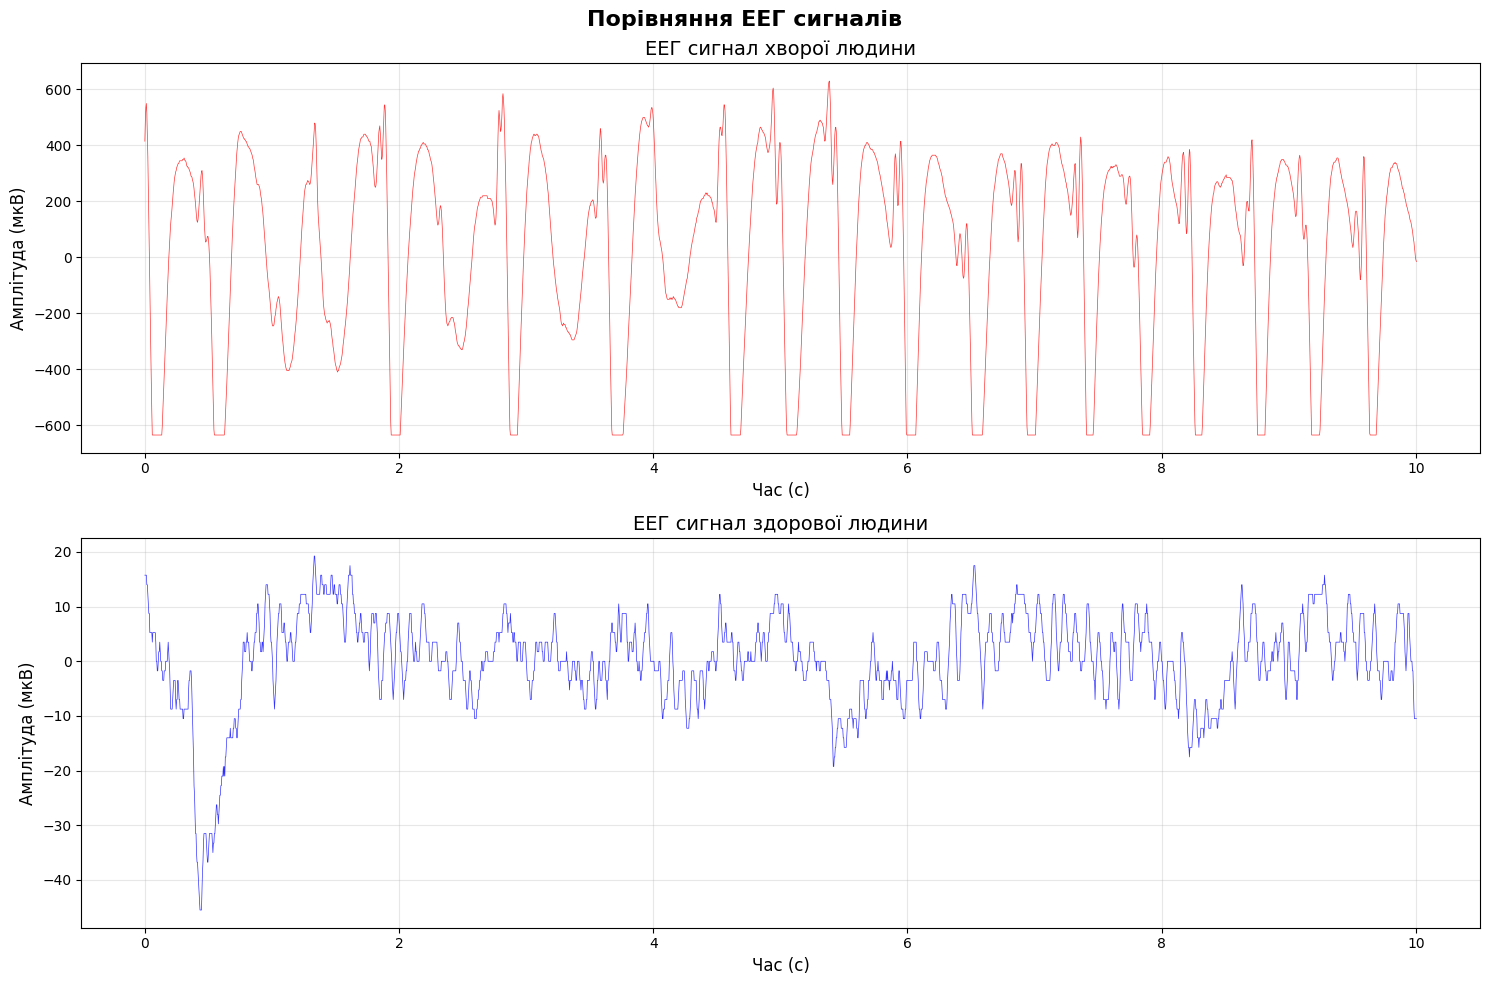

In [62]:
def process_eeg(file_path, header, sampling_rate=256):
    mat_data = sio.loadmat(file_path)
    
    eeg_signal = mat_data["sig"]

    duration, time = calculate_signal_duration(eeg_signal)
    
    if eeg_signal.ndim > 1:
        eeg_signal = eeg_signal.flatten()
    
    return eeg_signal, time, header

if __name__ == "__main__":
    eeg_sick, time_sick, header_sick = process_eeg("EEG/eeg_sick_1.mat", 'ЕЕГ сигнал хворої людини')
    eeg_healthy, time_healthy, header_healthy = process_eeg("EEG/eeg_healthy_1.mat", 'ЕЕГ сигнал здорової людини')
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    fig.suptitle('Порівняння ЕЕГ сигналів', fontsize=16, fontweight='bold')
    
    ax1.plot(time_sick, eeg_sick, 'r-', linewidth=0.5, alpha=0.8)
    ax1.set_xlabel('Час (с)', fontsize=12)
    ax1.set_ylabel('Амплітуда (мкВ)', fontsize=12)
    ax1.set_title(header_sick, fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(time_healthy, eeg_healthy, 'b-', linewidth=0.5, alpha=0.8)
    ax2.set_xlabel('Час (с)', fontsize=12)
    ax2.set_ylabel('Амплітуда (мкВ)', fontsize=12)
    ax2.set_title(header_healthy, fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    np.save('eeg_sick_signal.npy', eeg_sick)
    data_sick = np.column_stack((time_sick, eeg_sick))
    np.savetxt('eeg_sick_signal.csv', data_sick,
                delimiter=',', header='Time(s),Amplitude(microvolts)', comments='')
    print("Sick signal saved as: eeg_sick_signal.npy and .csv")
    
    np.save('eeg_healthy_signal.npy', eeg_healthy)
    data_healthy = np.column_stack((time_healthy, eeg_healthy))
    np.savetxt('eeg_healthy_signal.csv', data_healthy,
                delimiter=',', header='Time(s),Amplitude(microvolts)', comments='')
    print("Healthy signal saved as: eeg_healthy_signal.npy and .csv")
    
    plt.show()

4. Побудувати функцію для виводу на графік ділянки сигналів. В функцію передавати: час початку та закінчення ділянки (в секундах), вектор з відліками сигналу, частоту дискретизації. Передбачити перевірку правильності введення моментів часу, та можливість отримання за допомогою функції вектору з відліками ділянки сигналу та відліками часу. Використати функцію для виводу ділянки сигналу з виконаних завдань.

In [63]:
def plot_signal_segment (signal, sampling_rate, start_time, end_time, title="Signal segment", return_data = True):
    if signal is None or len(signal) == 0: 
        print ('signal is empty')
        return None
    
    total_duration = len(signal) / sampling_rate

    if start_time < 0:
        print(f"Time can not be negative number {start_time})")
        return None
    
    if end_time > total_duration:
        print(f"End time ({end_time}s) is larger than total duration ({total_duration:.2f}s)")
        return None
    
    if start_time >= end_time:
        print(f"Start time ({start_time}s) should be less than end time")
        return None
    
    start_index = max(math.ceil(start_time * sampling_rate), 0)
    end_index = min(math.floor(end_time * sampling_rate), len(signal))

    segment_signal = signal[start_index:end_index]

    segment_time = np.linspace(start_time, end_time, len(segment_signal))

    plt.figure(figsize=(14, 6))
    plt.plot(segment_time, segment_signal, 'b-', linewidth=0.8)
    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Amplitude (µV)', fontsize=12)
    plt.title(f'{title}\n[{start_time:.2f}s - {end_time:.2f}s]', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    info_text = f'Duration: {end_time-start_time:.2f}s\n'
    info_text += f'Number of counts: {len(segment_signal)}\n'
    info_text += f'Min: {np.min(segment_signal):.2f} µV\n'
    info_text += f'Max: {np.max(segment_signal):.2f} µV\n'
    info_text += f'Average: {np.mean(segment_signal):.2f} µV'
    
    plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    if return_data:
        print(f"Segment: {len(segment_signal)} counts from {start_time:.2f}s to {end_time:.2f}s")
        return segment_time, segment_signal
    
    return None


Example of usage on the previously saved signal from task 3:

In [64]:
signal = np.load('eeg_sick_signal.npy')
plot_signal_segment(signal, 256, 10, 7)

Start time (10s) should be less than end time


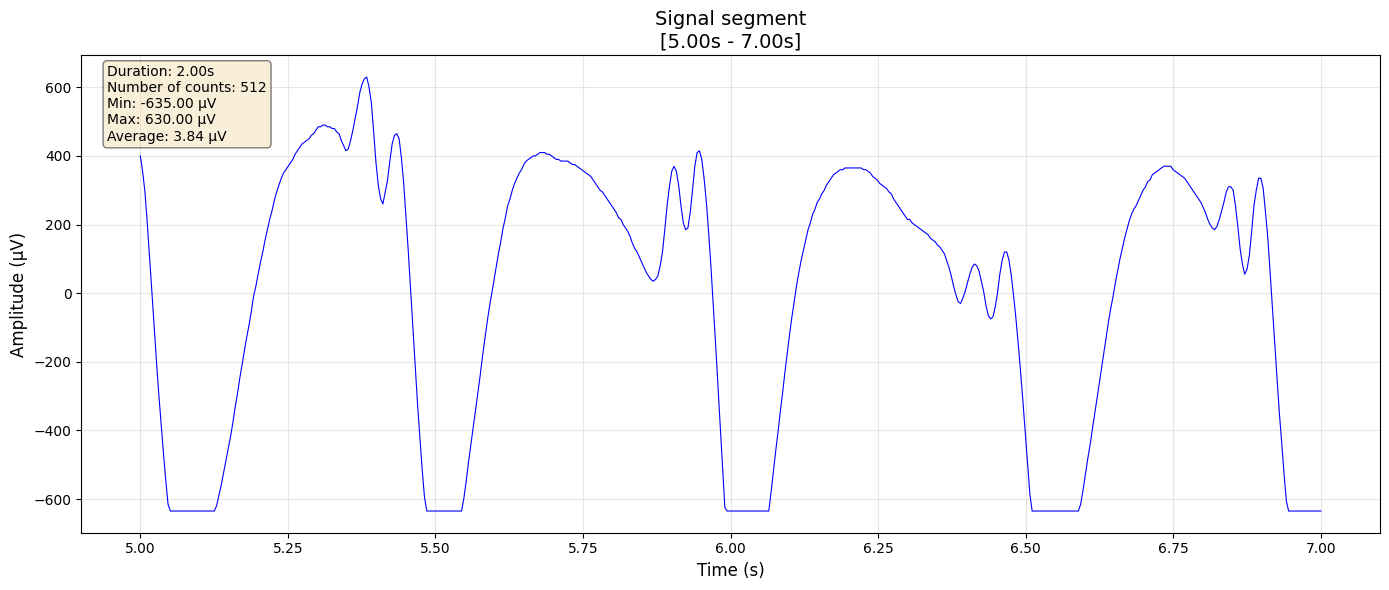

Segment: 512 counts from 5.00s to 7.00s


(array([5.        , 5.00391389, 5.00782779, 5.01174168, 5.01565558,
        5.01956947, 5.02348337, 5.02739726, 5.03131115, 5.03522505,
        5.03913894, 5.04305284, 5.04696673, 5.05088063, 5.05479452,
        5.05870841, 5.06262231, 5.0665362 , 5.0704501 , 5.07436399,
        5.07827789, 5.08219178, 5.08610568, 5.09001957, 5.09393346,
        5.09784736, 5.10176125, 5.10567515, 5.10958904, 5.11350294,
        5.11741683, 5.12133072, 5.12524462, 5.12915851, 5.13307241,
        5.1369863 , 5.1409002 , 5.14481409, 5.14872798, 5.15264188,
        5.15655577, 5.16046967, 5.16438356, 5.16829746, 5.17221135,
        5.17612524, 5.18003914, 5.18395303, 5.18786693, 5.19178082,
        5.19569472, 5.19960861, 5.2035225 , 5.2074364 , 5.21135029,
        5.21526419, 5.21917808, 5.22309198, 5.22700587, 5.23091977,
        5.23483366, 5.23874755, 5.24266145, 5.24657534, 5.25048924,
        5.25440313, 5.25831703, 5.26223092, 5.26614481, 5.27005871,
        5.2739726 , 5.2778865 , 5.28180039, 5.28

In [65]:
signal = np.load('eeg_sick_signal.npy')
plot_signal_segment(signal, 256, 5, 7)

# 7

Прочитати сигнали стабілограми людини, що були зареєстровані за допомогою платформи Wii Balance Board (https://en.wikipedia.org/wiki/Wii_Balance_Board). В папці data присутні сигнали для двох груп спортсменів - гравців в гандбол та акробатів, handball та acrobats відповідно. Кожний тип спортсменів виконував певні експерименти:

- base_close - стояти рівно, ноги разом, очі закриті
- base_open - стояти рівно, ноги разом, очі відкриті
- sway_front-back_30 - покачування вперед-назад під кутом 30 градусів, ноги разом, очі відкриті
- sway_front_back_60 - покачування вперед-назад під кутом 60 градусів, ноги разом, очі відкриті
- sway_left-right_30 - покачування вліво-вправо під кутом 30 градусів, ноги разом, очі відкриті
- sway_left-right_60 - покачування вліво-вправо під кутом 60 градусів, ноги разом, очі відкриті

### Виконати такі завдання:
1) Прочитати сигнали CoP (Center-of-Pressure) стабілограм спортсменів, що спеціалізуються на різних видах спорту. Для цього пропонуємо використати функцію read_csv бібліотеки роботи з табличними даними Pandas. Побудувати графіки (в протокол включити кілька графіків для прикладу). 

    Порядок стовпців в файлі:
    - time_ms - time in ms [column0]
    - top_left_f_kg - raw top_left sensor data [column1]
    - top_right_f_kg = raw top_right sensor data [column2]
    - bottom_left_f_kg = raw bottom_left sensor data [column3]
    - bottom_right_f_kg = raw bottom_right sensor data [column4]
    - cop_x = CoP X axis, mm [column5]
    - cop_y = CoP Y axis, mm [column6]
    - total_f = Total force [column7]

2) Обрати будь-які два типи сигналів (наприклад, base-open та sway_left-right_60) для двох типів спортсменів. 

3) Для кожного сигналу в папці відповідного типу порахувати статистичні параметри (середнє значення, медіанне значення, середнє квадратичне відхилення), окремо по осям Х та Y, звести в таблицю.
 


Reading stabilogram data:

In [66]:
def read_stabilogram_data(file_path):
    column_names = [
        'time_ms',          
        'top_left_f_kg',    
        'top_right_f_kg',   
        'bottom_left_f_kg', 
        'bottom_right_f_kg',
        'cop_x',            
        'cop_y',            
        'total_f'           
    ]
    try:
        df = pd.read_csv(file_path, sep='\s+', header=None,names=column_names)
        df['time_s'] = (df['time_ms'] - df['time_ms'].iloc[0]) / 1000.0
        return df
    
    except Exception as e:
        print(f"Exception while reading in {file_path}: {e}")
        return None

Plot for CoP Trajectory:

In [67]:
def plot_cop_trajectory(df, title="CoP trajectory", save_path=None):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    # CoP trajectory in 2d
    ax1 = axes[0, 0]
    ax1.plot(df['cop_x'], df['cop_y'], 'b-', linewidth=0.5, alpha=0.7)
    ax1.scatter(df['cop_x'].iloc[0], df['cop_y'].iloc[0], 
                c='green', s=100, marker='o', label='Start', zorder=5)
    ax1.scatter(df['cop_x'].iloc[-1], df['cop_y'].iloc[-1], 
                c='red', s=100, marker='s', label='Finish', zorder=5)
    ax1.set_xlabel('CoP X (mm)', fontsize=11)
    ax1.set_ylabel('CoP Y (mm)', fontsize=11)
    ax1.set_title('Trajectory CoP', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.axis('equal')
    
    # CoP x
    ax2 = axes[0, 1]
    ax2.plot(df['time_s'], df['cop_x'], 'r-', linewidth=0.8, alpha=0.8)
    ax2.set_xlabel('Time (s)', fontsize=11)
    ax2.set_ylabel('CoP X (mm)', fontsize=11)
    ax2.set_title('CoP oscillation along the X axis', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # stats
    stats_x = f'Average: {df["cop_x"].mean():.2f} mm\n'
    stats_x += f'STD: {df["cop_x"].std():.2f} mm\n'
    stats_x += f'Range: {df["cop_x"].max() - df["cop_x"].min():.2f} mm'
    ax2.text(0.02, 0.98, stats_x, transform=ax2.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # CoP Y
    ax3 = axes[1, 0]
    ax3.plot(df['time_s'], df['cop_y'], 'g-', linewidth=0.8, alpha=0.8)
    ax3.set_xlabel('Time (с)', fontsize=11)
    ax3.set_ylabel('CoP Y (mm)', fontsize=11)
    ax3.set_title('CoP oscillation along the Y axis', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # stats
    stats_y = f'Average: {df["cop_y"].mean():.2f} mm\n'
    stats_y += f'STD: {df["cop_y"].std():.2f} mm\n'
    stats_y += f'Range: {df["cop_y"].max() - df["cop_y"].min():.2f} mm'
    ax3.text(0.02, 0.98, stats_y, transform=ax3.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    # force
    ax4 = axes[1, 1]
    ax4.plot(df['time_s'], df['total_f'], 'm-', linewidth=0.8, alpha=0.8)
    ax4.set_xlabel('Time (s)', fontsize=11)
    ax4.set_ylabel('Total force (kg)', fontsize=11)
    ax4.set_title('Total force', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # stats
    stats_f = f'average: {df["total_f"].mean():.2f} kg\n'
    stats_f += f'STD: {df["total_f"].std():.2f} kg\n'
    stats_f += f'Min: {df["total_f"].min():.2f} kg\n'
    stats_f += f'Max: {df["total_f"].max():.2f} kg'
    ax4.text(0.02, 0.98, stats_f, transform=ax4.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='plum', alpha=0.5))
    
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig


Example of usage on acrobat base close file:

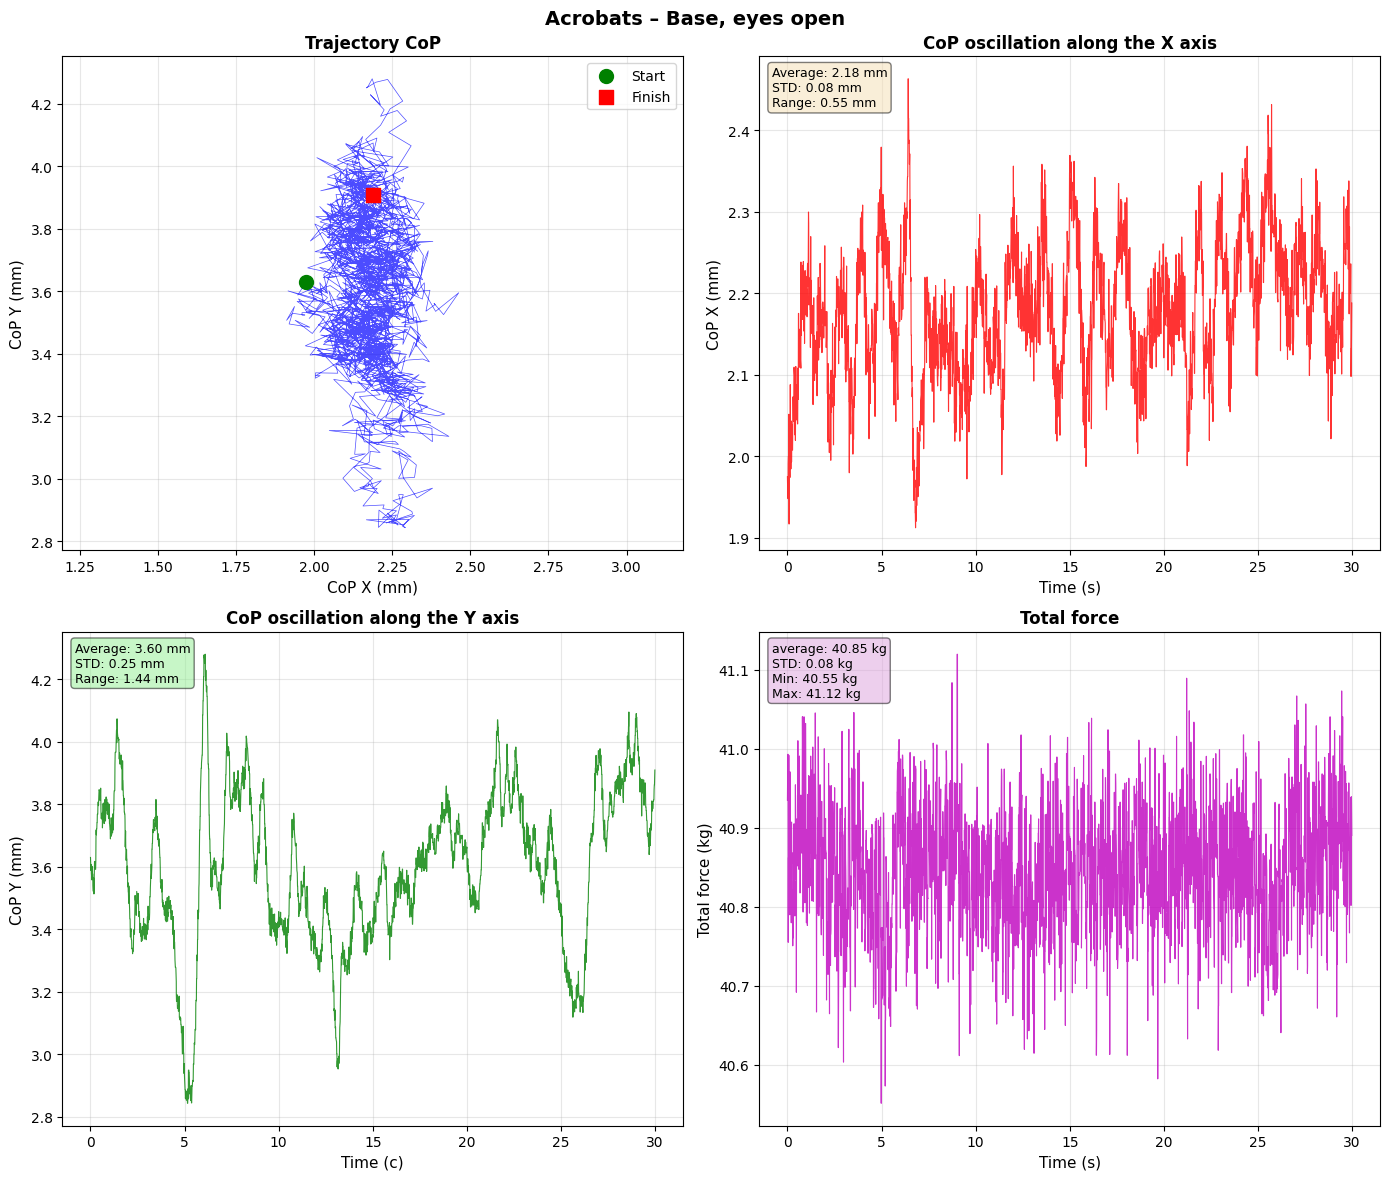

      time_ms  top_left_f_kg  top_right_f_kg  bottom_left_f_kg  \
0      581577        6.54783         8.96703           12.3028   
1      581598        6.61739         8.97637           12.2818   
2      581609        6.61739         8.97637           12.2818   
3      581618        6.55652         8.92033           12.1982   
4      581628        6.55652         9.00440           12.2400   
...       ...            ...             ...               ...   
2732   611520        6.41739         8.75220           12.2714   
2733   611533        6.40000         8.79890           12.3237   
2734   611541        6.40000         8.79890           12.3237   
2735   611555        6.37391         8.74286           12.2818   
2736   611560        6.37391         8.74286           12.2818   

      bottom_right_f_kg    cop_x    cop_y  total_f  time_s  
0               13.1172  1.97488  3.62960  40.9349   0.000  
1               13.1172  1.94812  3.58794  40.9928   0.021  
2               13.1172 

In [68]:
if __name__ == "__main__":
    sample_file = "data/acrobats/base_close/11.csv"
    
    if os.path.exists(sample_file):
        df = read_stabilogram_data(sample_file)
        if df is not None:
            plot_cop_trajectory(df, title="Acrobats – Base, eyes open") 
print(df)

In [83]:
def stats_val_calculation(folder):
    contents = os.listdir(folder)
    all_dfs = []
    
    for file in contents:
        file_path = os.path.join(folder, file)        
        df = read_stabilogram_data(file_path)
        all_dfs.append(df)
    combined_df = pd.concat(all_dfs, ignore_index=True)
    
    print("\n--- Середні значення для всіх стовпців ---")
    print(f"top_left_f_kg:    {combined_df['top_left_f_kg'].mean():.3f}")
    print(f"top_right_f_kg:   {combined_df['top_right_f_kg'].mean():.3f}")
    print(f"bottom_left_f_kg: {combined_df['bottom_left_f_kg'].mean():.3f}")
    print(f"bottom_right_f_kg:{combined_df['bottom_right_f_kg'].mean():.3f}")
    print(f"cop_x:            {combined_df['cop_x'].mean():.3f}")
    print(f"cop_y:            {combined_df['cop_y'].mean():.3f}")
    print(f"total_f:          {combined_df['total_f'].mean():.3f}")
    
    return combined_df

combined_df = stats_val_calculation('data/acrobats/base_open')
print(f"\nЗагальна кількість записів: {len(combined_df)}")


--- Середні значення для всіх стовпців ---
top_left_f_kg:    6.957
top_right_f_kg:   7.986
bottom_left_f_kg: 13.108
bottom_right_f_kg:11.295
cop_x:            -0.147
cop_y:            3.682
total_f:          39.346

Загальна кількість записів: 30025
